# Titanic
# Week 2 - Example Solution
### Week 1 was about exploring the data
### Week 2 is about building a simple Machine Learning model to predict survivors

Import Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split

# Import the Data

In [2]:
train_df = pd.read_csv('train.csv')  # Dataset to Train and Validate on

# Some Data Exploration

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Enumerate 'Sex' feature (make it a number)

In [5]:
train_df['Sex'].replace(['female','male'],[1,0], inplace=True)        # Enumerate 'Sex'

### One Hot Encode Pclass
* Makes 3 features for Pclass 1,2,3

In [6]:
pclass_onehot = pd.get_dummies(train_df['Pclass'], prefix='Pclass')    # one-hot encode Pclass
train_df = pd.concat([train_df, pclass_onehot], axis=1)
train_df.drop('Pclass', axis=1, inplace=True)                          # don't need Pclass now

### Make a 'Child' Feature

In [7]:
train_df['Child'] = 0
train_df.loc[train_df['Age'] < 8, 'Child'] = 1  

In [8]:
train_df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Child
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,0,0
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


## Check Correlations

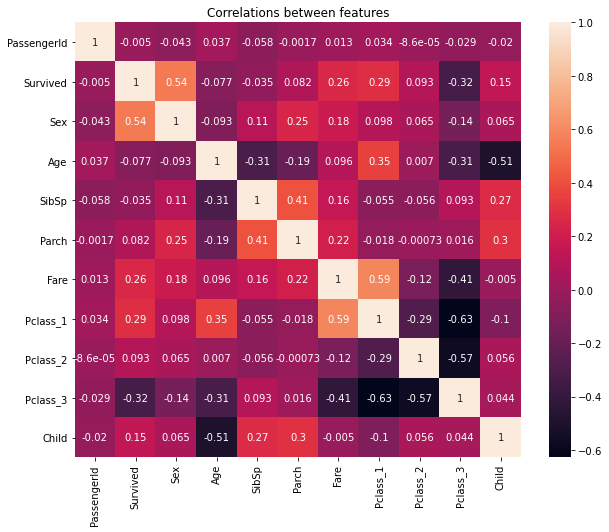

In [9]:
corr = train_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.title('Correlations between features')
plt.show()

#### Observations
* Sex has the highest correlation with Survived
* Pclass is the second most important

# Prepare Data for Analysis

* Use Sex and Pclass features
* Drop unnecessary fields

In [10]:
X = train_df

X = X.drop(['Name','Ticket','Cabin','Embarked',
           'SibSp','Age','Parch','Fare','PassengerId'], axis=1)   # Drop Features we don't want

#### Any NaNs ?

In [11]:
print(X.isnull().sum())
X.dropna(axis=0, inplace=True)   # Drop any NaNs

Survived    0
Sex         0
Pclass_1    0
Pclass_2    0
Pclass_3    0
Child       0
dtype: int64


#### Prepare the X, y data for ML, split into Train / Test data

In [12]:
y = X['Survived']   # Prepare the training labels
X.drop(['Survived'], axis=1, inplace=True)  # Remove Labels from the Training Set

# Train / Test Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Sex       712 non-null    int64
 1   Pclass_1  712 non-null    uint8
 2   Pclass_2  712 non-null    uint8
 3   Pclass_3  712 non-null    uint8
 4   Child     712 non-null    int64
dtypes: int64(2), uint8(3)
memory usage: 18.8 KB


# Machine Learning Model

### A machine learning model can be used to predict if a person would survive the Titanic disaster

### We train the model on a portion of the data (Training set)

### We test (or validate) the model on data that has not been used for training, to see how well it predicts survival on data that it has not seen before


* Build a Model based on our Training Set
* Validate on our Test / Validation set

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Instantiate a Classifier and fit with Xtrain and ytrain
clf = DecisionTreeClassifier()
clf = clf.fit(Xtrain, ytrain)

# Validate with the Test / Validation set
y_pred = clf.predict(Xtest)

In [15]:
# check the training accuracy (showing two different ways to calculate)
print(f'Validation Set Accuracy : {clf.score(Xtest, ytest)}\n')

Validation Set Accuracy : 0.7877094972067039



# Cross-Validation
https://scikit-learn.org/stable/modules/cross_validation.html



In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.74860335, 0.80337079, 0.79775281, 0.78651685, 0.82022472])

In [17]:
scores.mean()

0.7912937040989266

## Prepare Submission to Kaggle

In [28]:
test_df = pd.read_csv('test.csv')

test_df['Sex'].replace(['female','male'],[1,0], inplace=True)        # Enumerate 'Sex'
pclass_onehot = pd.get_dummies(test_df['Pclass'], prefix='Pclass')   # one-hot encode Pclass
test_df = pd.concat([test_df, pclass_onehot], axis=1)

test_df['Child'] = 0
test_df.loc[test_df['Age'] < 8, 'Child'] = 1                          # child feature

test_df.drop('Pclass', axis=1, inplace=True)                          # don't need Pclass now

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    object 
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Pclass_1     418 non-null    uint8  
 11  Pclass_2     418 non-null    uint8  
 12  Pclass_3     418 non-null    uint8  
 13  Child        418 non-null    int64  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 37.3+ KB


In [30]:
Xtest = test_df.drop(['Name','Ticket','Cabin','Embarked',
           'SibSp','Age','Parch','Fare','PassengerId'], axis=1)

predict = clf.predict(Xtest).astype(int)

submit = pd.DataFrame({'PassengerId' : [], 'Survived' : []})
submit['PassengerId'] = test_df.PassengerId
submit['Survived'] = predict
submit.to_csv('./submit.csv', index=False)

In [32]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
